**Import Dependencies**

In [ ]:
import math
import cv2
import numpy as np
from PIL import Image, ImageStat
from numpy import asarray
from matplotlib import pyplot as plt



---


**Problem 1**

Distance using Chessboard Distance between 2 ships: 184.0
Distance using Chessboard Distance between the left edge of the small Boat and left Canal bank: 42.0
Distance using Chessboard Distance between the right edge of the small Boat and right Canal bank: 109.0
Distance using Chessboard Distance between the left edge of the Big Boat and left Canal bank: 41.0
Distance using Chessboard Distance between the right edge of the Big Boat and right Canal bank: 77.0
Distance using City-Block Distance between 2 ships: 185.0
Distance using City-Block Distance between the left edge of the small Boat and left Canal bank: 42.0
Distance using City-Block Distance between the right edge of the small Boat and right Canal bank: 109.0
Distance using City-Block Distance between the left edge of the Big Boat and left Canal bank: 41.0
Distance using City-Block Distance between the right edge of the Big Boat and right Canal bank: 77.0
Distance using Euclidean Distance between 2 ships: 184.4142135623731
Dista

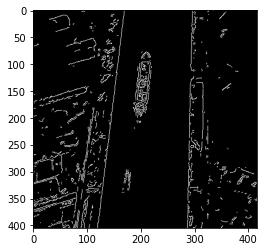

In [ ]:
def distance_transform(img,distance_measure):
############### Euclidean Distance measure #######################################  
  if (distance_measure=='Euclidean Distance'):
    def euclidean_calculator(x1,y1,x2,y2):
      point1 = np.array((x1,y1))
      point2 = np.array((x2,y2))
      dist = np.linalg.norm(point1 - point2)
      return dist

    img_euclidean=np.ones(img.shape)*math.inf
    img_euclidean[150][200]=0
    distances = []

    # distance between the two ships
    # First Pass
    for i in range(1,img_euclidean.shape[0]-1):
      for j in range(1,img_euclidean.shape[1]):
        centre = img_euclidean[i][j]
        left = img_euclidean[i][j-1]+euclidean_calculator(i,j,i,j-1)
        left_bottom = img_euclidean[i+1][j-1]+euclidean_calculator(i,j,i+1,j-1)
        top_left = img_euclidean[i-1][j-1]+euclidean_calculator(i,j,i-1,j-1)
        top = img_euclidean[i-1][j]+euclidean_calculator(i,j,i-1,j)
        img_euclidean[i][j]=min(centre, top_left, left, left_bottom, top)
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/Suez_1_Euclidean.bmp', img_euclidean)
    img_euclidean1 = img_euclidean

    # Second Pass
    for i in range(img_euclidean.shape[0]-2,0,-1):
      for j in range(img_euclidean.shape[1]-2,-1,-1):
        centre = img_euclidean[i][j]
        right_bottom = img_euclidean[i+1][j+1]+euclidean_calculator(i,j,i+1,j+1)
        bottom = img_euclidean[i+1][j]+euclidean_calculator(i,j,i+1,j)
        top_right = img_euclidean[i-1][j+1]+euclidean_calculator(i,j,i-1,j+1)
        right = img_euclidean[i][j+1]+euclidean_calculator(i,j,i,j+1)
        img_euclidean[i][j]=min(centre, top_right, right, right_bottom, bottom)
    print("Distance using Euclidean Distance between 2 ships:",img_euclidean[310][175])
    distances.append(img_euclidean[310][175])
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/Suez_final_Euclidean.bmp', img_euclidean)

    # Distance between the left edge of the small Boat and left Canal bank
    smallLeftCanal=np.ones(img.shape)*math.inf
    smallLeftCanal[310][173]=0 # left edge pixel

    # First Pass
    for i in range(1,smallLeftCanal.shape[0]-1):
      for j in range(1,smallLeftCanal.shape[1]):
        left = smallLeftCanal[i][j-1] + euclidean_calculator(i,j,i,j-1)
        centre = smallLeftCanal[i][j]
        top = smallLeftCanal[i-1][j] + euclidean_calculator(i,j,i-1,j)
        top_left = smallLeftCanal[i-1][j-1] + euclidean_calculator(i,j,i-1,j-1)
        left_bottom = smallLeftCanal[i+1][j-1] + euclidean_calculator(i,j,i+1,j-1)
        smallLeftCanal[i][j]=min(centre, top, top_left, left_bottom, left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/leftEdgeLeftCanalSmall_1st.jpg', smallLeftCanal)
    
    # Second Pass
    for i in range(smallLeftCanal.shape[0]-2,0,-1):
      for j in range(smallLeftCanal.shape[1]-2,-1,-1):
        right_bottom = smallLeftCanal[i+1][j+1] + euclidean_calculator(i,j,i+1,j+1)
        centre = smallLeftCanal[i][j]
        top_right = smallLeftCanal[i-1][j+1] + euclidean_calculator(i,j,i-1,j+1)
        bottom = smallLeftCanal[i+1][j] + euclidean_calculator(i,j,i+1,j)
        right = smallLeftCanal[i][j+1] + euclidean_calculator(i,j,i,j+1)
        smallLeftCanal[i][j]=min(right_bottom, centre, top_right, bottom, right)
    print("Distance using Euclidean Distance between the left edge of the small Boat and left Canal bank:",smallLeftCanal[310][131])
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/leftEdgeLeftCanalSmall_2nd.jpg', smallLeftCanal)
    distances.append(smallLeftCanal[310][131])

    # Distance between the right edge of the small boat and the right bank of the canal
    smallRightCanal=np.ones(img.shape)*math.inf
    smallRightCanal[310][180]=0 # right edge pixel

    # First Pass
    for i in range(1,smallRightCanal.shape[0]-1):
      for j in range(1,smallRightCanal.shape[1]):
        left_bottom = smallRightCanal[i+1][j-1]+euclidean_calculator(i,j,i+1,j-1)
        top = smallRightCanal[i-1][j]+euclidean_calculator(i,j,i-1,j)
        centre = smallRightCanal[i][j]
        top_left = smallRightCanal[i-1][j-1]+euclidean_calculator(i,j,i-1,j-1)
        left = smallRightCanal[i][j-1]+euclidean_calculator(i,j,i,j-1)
        smallRightCanal[i][j]=min(top, centre, left, top_left, left_bottom)
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/rightEdgeRightCanalSmall_1st.jpg', smallRightCanal)

    # Second Pass
    for i in range(smallRightCanal.shape[0]-2,0,-1):
      for j in range(smallRightCanal.shape[1]-2,-1,-1):
        centre = smallRightCanal[i][j]
        top_right = smallRightCanal[i-1][j+1]+euclidean_calculator(i,j,i-1,j+1)
        right = smallRightCanal[i][j+1]+euclidean_calculator(i,j,i,j+1)
        right_bottom = smallRightCanal[i+1][j+1]+euclidean_calculator(i,j,i+1,j+1)
        bottom = smallRightCanal[i+1][j]+euclidean_calculator(i,j,i+1,j)
        smallRightCanal[i][j]=min(bottom, centre, right, top_right, right_bottom)
    print("Distance using Euclidean Distance between the right edge of the small boat and the right bank of the canal:",smallRightCanal[310][289])
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/rightEdgeRightCanalSmall_2nd.jpg', smallRightCanal)
    distances.append(smallRightCanal[310][289])

    # Distance between the left edge of the Big Boat and left Canal bank
    bigleftCanal=np.ones(img.shape)*math.inf
    bigleftCanal[150][192]=0 # left edge pixel

    # First Pass
    for i in range(1,bigleftCanal.shape[0]-1):
      for j in range(1,bigleftCanal.shape[1]):
        top_left = bigleftCanal[i-1][j-1]+euclidean_calculator(i,j,i-1,j-1)
        left = bigleftCanal[i][j-1]+euclidean_calculator(i,j,i,j-1)
        left_bottom = bigleftCanal[i+1][j-1]+euclidean_calculator(i,j,i+1,j-1)
        centre = bigleftCanal[i][j]
        top = bigleftCanal[i-1][j]+euclidean_calculator(i,j,i-1,j)
        bigleftCanal[i][j]=min(top, centre, left, top_left, left_bottom)
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/leftEdgeLeftCanalBig_1st.jpg', bigleftCanal)

    # Second Pass
    for i in range(bigleftCanal.shape[0]-2,0,-1):
      for j in range(bigleftCanal.shape[1]-2,-1,-1):
        centre = bigleftCanal[i][j]
        top_right = bigleftCanal[i-1][j+1]+euclidean_calculator(i,j,i-1,j+1)
        right = bigleftCanal[i][j+1]+euclidean_calculator(i,j,i,j+1)
        right_bottom = bigleftCanal[i+1][j+1]+euclidean_calculator(i,j,i+1,j+1)
        bottom = bigleftCanal[i+1][j]+euclidean_calculator(i,j,i+1,j)
        bigleftCanal[i][j]=min(centre, bottom, right, right_bottom, top_right)
    print("Distance using Euclidean Distance between the left edge of the Big Boat and left Canal bank:",bigleftCanal[150][151])
    distances.append(bigleftCanal[150][151])
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/leftEdgeLeftCanalBig_2nd.jpg', bigleftCanal)

    # Distance between the right edge of the Big Boat and right Canal bank
    bigrightCanal=np.ones(img.shape)*math.inf
    bigrightCanal[150][215]=0 # right edge pixel

    # First Pass
    for i in range(1,bigrightCanal.shape[0]-1):
      for j in range(1,bigrightCanal.shape[1]):
        centre = bigrightCanal[i][j]
        top_left = bigrightCanal[i-1][j-1]+euclidean_calculator(i,j,i-1,j-1)
        left = bigrightCanal[i][j-1]+euclidean_calculator(i,j,i,j-1)
        left_bottom = bigrightCanal[i+1][j-1]+euclidean_calculator(i,j,i+1,j-1)
        top = bigrightCanal[i-1][j]+euclidean_calculator(i,j,i-1,j)
        bigrightCanal[i][j]=min(top, centre, left_bottom, top_left, left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/rightEdgeRightCanalBig_1st.jpg', bigrightCanal)

    # Second Pass
    for i in range(bigrightCanal.shape[0]-2,0,-1):
      for j in range(bigrightCanal.shape[1]-2,-1,-1):
        centre = bigrightCanal[i][j]
        top_right = bigrightCanal[i-1][j+1]+euclidean_calculator(i,j,i-1,j+1)
        right = bigrightCanal[i][j+1]+euclidean_calculator(i,j,i,j+1)
        right_bottom = bigrightCanal[i+1][j+1]+euclidean_calculator(i,j,i+1,j+1)
        bottom = bigrightCanal[i+1][j]+euclidean_calculator(i,j,i+1,j)
        bigrightCanal[i][j]=min(bottom, centre, top_right, right_bottom, right)
    print("Distance using Euclidean Distance between the right edge of the Big Boat and right Canal bank:",bigrightCanal[150][292])
    cv2.imwrite(r'/content/gdrive/MyDrive/Euclidean Distance outputs/rightEdgeRightCanalBig_2nd.jpg', bigrightCanal)
    distances.append(bigrightCanal[150][292])
    return img_euclidean1, img_euclidean, distances


################################# City Block Distance measure #################################
  elif(distance_measure == 'City-Block Distance'):

    img_city=np.ones(img.shape)*math.inf
    img_city[150][200]=0 # reference point
    distances = []
    # Distance between 2 ships
    # First Pass
    for i in range(1,img_city.shape[0]-1):
      for j in range(1,img_city.shape[1]):
        left = img_city[i][j-1]+1
        left_bottom = img_city[i+1][j-1]+2
        top = img_city[i-1][j]+1
        centre = img_city[i][j]
        top_left = img_city[i-1][j-1]+2
        img_city[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/Suez_1_City.bmp', img_city)
    img_city1= img_city
      

    # Second Pass
    for i in range(img_city.shape[0]-2,0,-1):
      for j in range(img_city.shape[1]-2,-1,-1):
        centre = img_city[i][j]
        top_right = img_city[i-1][j+1]+2
        right = img_city[i][j+1]+1
        bottom_right = img_city[i+1][j+1]+2
        bottom = img_city[i+1][j]+1
        img_city[i][j]=min(centre, bottom, right, top_right, bottom_right)
    print("Distance using City-Block Distance between 2 ships:",img_city[310][175])
    distances.append(img_city[310][175])
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/Suez_final_City.bmp', img_city)

    # Distance between the left edge of the small Boat and left Canal bank
    smallLeftCanal=np.ones(img.shape)*math.inf
    smallLeftCanal[310][173]=0

    # First Pass
    for i in range(1,smallLeftCanal.shape[0]-1):
      for j in range(1,smallLeftCanal.shape[1]):
        centre = smallLeftCanal[i][j]
        top_left = smallLeftCanal[i-1][j-1]+2
        left = smallLeftCanal[i][j-1]+1
        left_bottom = smallLeftCanal[i+1][j-1]+2
        top = smallLeftCanal[i-1][j]+1
        smallLeftCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/leftEdgeLeftCanalSmall_1st.jpg', smallLeftCanal)

    # Second Pass
    for i in range(smallLeftCanal.shape[0]-2,0,-1):
      for j in range(smallLeftCanal.shape[1]-2,-1,-1):
        centre = smallLeftCanal[i][j]
        top_right = smallLeftCanal[i-1][j+1]+2
        right = smallLeftCanal[i][j+1]+1
        bottom_right = smallLeftCanal[i+1][j+1]+2
        bottom = smallLeftCanal[i+1][j]+1
        smallLeftCanal[i][j]=min(centre, bottom, right, top_right, bottom_right)
    print("Distance using City-Block Distance between the left edge of the small Boat and left Canal bank:",smallLeftCanal[310][131])
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/leftEdgeLeftCanalSmall_2nd.jpg', smallLeftCanal)
    distances.append(smallLeftCanal[310][131])

    # Distance between the right edge of the small Boat and right Canal bank
    smallRightCanal=np.ones(img.shape)*math.inf
    smallRightCanal[310][180]=0 # right edge pixel

    # First Pass
    for i in range(1,smallRightCanal.shape[0]-1):
      for j in range(1,smallRightCanal.shape[1]):
        centre = smallRightCanal[i][j]
        top_left = smallRightCanal[i-1][j-1]+2
        left = smallRightCanal[i][j-1]+1
        left_bottom = smallRightCanal[i+1][j-1]+2
        top = smallRightCanal[i-1][j]+1
        smallRightCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/rightEdgeRightCanalSmall_1st.jpg', smallRightCanal)

    # Second Pass
    for i in range(smallRightCanal.shape[0]-2,0,-1):
      for j in range(smallRightCanal.shape[1]-2,-1,-1):
        centre = smallRightCanal[i][j]
        top_right = smallRightCanal[i-1][j+1]+2
        right = smallRightCanal[i][j+1]+1
        bottom_right = smallRightCanal[i+1][j+1]+2
        bottom = smallRightCanal[i+1][j]+1
        smallRightCanal[i][j]=min(centre, bottom, right, top_right, bottom_right)
    print("Distance using City-Block Distance between the right edge of the small Boat and right Canal bank:",smallRightCanal[310][289])
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/rightEdgeRightCanalSmall_2nd.jpg', smallRightCanal)
    distances.append(smallRightCanal[310][289])


    # Distance between the left edge of the Big Boat and left Canal bank
    bigleftCanal=np.ones(img.shape)*math.inf
    bigleftCanal[150][192]=0 # left edge pixel

    # First Pass
    for i in range(1,bigleftCanal.shape[0]-1):
      for j in range(1,bigleftCanal.shape[1]):
        centre = bigleftCanal[i][j]
        top_left = bigleftCanal[i-1][j-1]+2
        left = bigleftCanal[i][j-1]+1
        left_bottom = bigleftCanal[i+1][j-1]+2
        top = bigleftCanal[i-1][j]+1
        bigleftCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/leftEdgeLeftCanalBig_1st.jpg', bigleftCanal)

    # Second Pass
    for i in range(bigleftCanal.shape[0]-2,0,-1):
      for j in range(bigleftCanal.shape[1]-2,-1,-1):
        top_right = bigleftCanal[i-1][j+1]+2
        right = bigleftCanal[i][j+1]+1
        bottom_right = bigleftCanal[i+1][j+1]+2
        centre = bigleftCanal[i][j]
        bottom = bigleftCanal[i+1][j]+1
        bigleftCanal[i][j]=min(centre, bottom, right, top_right, bottom_right)
    print("Distance using City-Block Distance between the left edge of the Big Boat and left Canal bank:",bigleftCanal[150][151])
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/leftEdgeLeftCanalBig_2nd.jpg', bigleftCanal)
    distances.append(bigleftCanal[150][151])

    # Distance between the right edge of the Big Boat and right Canal bank
    bigrightCanal=np.ones(img.shape)*math.inf
    bigrightCanal[150][215]=0 # right edge pixel

    for i in range(1,bigrightCanal.shape[0]-1):
      for j in range(1,bigrightCanal.shape[1]):
        centre = bigrightCanal[i][j]
        top_left = bigrightCanal[i-1][j-1]+2
        left = bigrightCanal[i][j-1]+1
        left_bottom = bigrightCanal[i+1][j-1]+2
        top = bigrightCanal[i-1][j]+1
        bigrightCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/rightEdgeRightCanalBig_1st.jpg', bigrightCanal)

    # Second Pass
    for i in range(bigrightCanal.shape[0]-2,0,-1):
      for j in range(bigrightCanal.shape[1]-2,-1,-1):
        centre = bigrightCanal[i][j]
        top_right = bigrightCanal[i-1][j+1]+2
        right = bigrightCanal[i][j+1]+1
        bottom_right = bigrightCanal[i+1][j+1]+2
        bottom = bigrightCanal[i+1][j]+1
        bigrightCanal[i][j]=min(centre, bottom, right, top_right, bottom_right)
    print("Distance using City-Block Distance between the right edge of the Big Boat and right Canal bank:",bigrightCanal[150][292])
    cv2.imwrite(r'/content/gdrive/MyDrive/City Distance outputs/rightEdgeRightCanalBig_2nd.jpg', bigrightCanal)
    distances.append(bigrightCanal[150][292])
    return img_city1, img_city, distances



############################ Chessboard Distance measure (+1 in all 4 directions) #############################################
  elif(distance_measure == 'Chessboard Distance'):
    img_chess=np.ones(img.shape)*math.inf
    img_chess[150][200]=0
    distances = []
    # Distance between both ships
    # First Pass
    for i in range(1,img_chess.shape[0]-1):
      for j in range(1,img_chess.shape[1]):
        centre = img_chess[i][j]
        top_left = img_chess[i-1][j-1]+1
        top = img_chess[i-1][j]+1
        left = img_chess[i][j-1]+1
        left_bottom = img_chess[i+1][j-1]+1
        img_chess[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/Suez_1_Chess.bmp', img_chess)
    img_chess1 = img_chess


    # Second Pass
    for i in range(img_chess.shape[0]-2,0,-1):
      for j in range(img_chess.shape[1]-2,-1,-1):
        right = img_chess[i][j+1]+1
        right_bottom = img_chess[i+1][j+1]+1
        centre = img_chess[i][j]
        top_right = img_chess[i-1][j+1]+1
        bottom = img_chess[i+1][j]+1
        img_chess[i][j]=min(centre, bottom, right, top_right, right_bottom)
    print("Distance using Chessboard Distance between 2 ships:",img_chess[310][175])
    distances.append(img_chess[310][175])
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/Suez_final_Chess.bmp', img_chess)

     # Distance between the left edge of the small Boat and left Canal bank
    smallLeftCanal=np.ones(img.shape)*math.inf
    smallLeftCanal[310][173]=0
    # First Pass
    for i in range(1,smallLeftCanal.shape[0]-1):
      for j in range(1,smallLeftCanal.shape[1]):
        centre = smallLeftCanal[i][j]
        top_left = smallLeftCanal[i-1][j-1]+1
        top = smallLeftCanal[i-1][j]+1
        left = smallLeftCanal[i][j-1]+1
        left_bottom = smallLeftCanal[i+1][j-1]+1
        smallLeftCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/leftEdgeLeftCanalSmall_1st.jpg', smallLeftCanal)


    # Second Pass
    for i in range(smallLeftCanal.shape[0]-2,0,-1):
      for j in range(smallLeftCanal.shape[1]-2,-1,-1):
        right = smallLeftCanal[i][j+1]+1
        right_bottom = smallLeftCanal[i+1][j+1]+1
        centre = smallLeftCanal[i][j]
        top_right = smallLeftCanal[i-1][j+1]+1
        bottom = smallLeftCanal[i+1][j]+1
        smallLeftCanal[i][j]=min(centre, bottom, right, top_right, right_bottom)
    distances.append(smallLeftCanal[310][131])
    print("Distance using Chessboard Distance between the left edge of the small Boat and left Canal bank:",smallLeftCanal[310][131])
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/leftEdgeLeftCanalSmall_2nd.jpg', smallLeftCanal)


    # Distance between the right edge of the small Boat and right Canal bank
    smallRightCanal=np.ones(img.shape)*math.inf
    smallRightCanal[310][180]=0 # right edge pixel

    # First Pass
    for i in range(1,smallRightCanal.shape[0]-1):
      for j in range(1,smallRightCanal.shape[1]):
        centre = smallRightCanal[i][j]
        top_left = smallRightCanal[i-1][j-1]+1
        top = smallRightCanal[i-1][j]+1
        left = smallRightCanal[i][j-1]+1
        left_bottom = smallRightCanal[i+1][j-1]+1
        smallRightCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/rightEdgeRightCanalSmall_1st.jpg', smallRightCanal)


    # Second Pass
    for i in range(smallRightCanal.shape[0]-2,0,-1):
      for j in range(smallRightCanal.shape[1]-2,-1,-1):
        right = smallRightCanal[i][j+1]+1
        right_bottom = smallRightCanal[i+1][j+1]+1
        centre = smallRightCanal[i][j]
        top_right = smallRightCanal[i-1][j+1]+1
        bottom = smallRightCanal[i+1][j]+1
        smallRightCanal[i][j]=min(centre, bottom, right, top_right, right_bottom)
    print("Distance using Chessboard Distance between the right edge of the small Boat and right Canal bank:",smallRightCanal[310][289])
    distances.append(smallRightCanal[310][289])
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/rightEdgeRightCanalSmall_2nd.jpg', smallRightCanal)


    # Distance between the left edge of the Big Boat and left Canal bank
    bigleftCanal=np.ones(img.shape)*math.inf
    bigleftCanal[150][192]=0 # left edge pixel

    # First Pass
    for i in range(1,bigleftCanal.shape[0]-1):
      for j in range(1,bigleftCanal.shape[1]):
        centre = bigleftCanal[i][j]
        top_left = bigleftCanal[i-1][j-1]+1
        top = bigleftCanal[i-1][j]+1
        left = bigleftCanal[i][j-1]+1
        left_bottom = bigleftCanal[i+1][j-1]+1
        bigleftCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/leftEdgeLeftCanalBig_1st.jpg', bigleftCanal)


    # Second Pass
    for i in range(bigleftCanal.shape[0]-2,0,-1):
      for j in range(bigleftCanal.shape[1]-2,-1,-1):
        right = bigleftCanal[i][j+1]+1
        right_bottom = bigleftCanal[i+1][j+1]+1
        centre = bigleftCanal[i][j]
        top_right = bigleftCanal[i-1][j+1]+1
        bottom = bigleftCanal[i+1][j]+1
        bigleftCanal[i][j]=min(centre, bottom, right, top_right, right_bottom)
    print("Distance using Chessboard Distance between the left edge of the Big Boat and left Canal bank:",bigleftCanal[150][151])
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/leftEdgeLeftCanalBig_2nd.jpg', bigleftCanal)
    distances.append(bigleftCanal[150][151])
    

    # Distance between the right edge of the Big Boat and right Canal bank
    bigrightCanal=np.ones(img.shape)*math.inf
    bigrightCanal[150][215]=0 # right edge pixel

    # First Pass
    for i in range(1,bigrightCanal.shape[0]-1):
      for j in range(1,bigrightCanal.shape[1]):
        centre = bigrightCanal[i][j]
        top_left = bigrightCanal[i-1][j-1]+1
        top = bigrightCanal[i-1][j]+1
        left = bigrightCanal[i][j-1]+1
        left_bottom = bigrightCanal[i+1][j-1]+1
        bigrightCanal[i][j]=min(top, centre, left, left_bottom, top_left)
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/rightEdgeRightCanalBig_1st.jpg', bigrightCanal)


    # Second Pass
    for i in range(bigrightCanal.shape[0]-2,0,-1):
      for j in range(bigrightCanal.shape[1]-2,-1,-1):
        right = bigrightCanal[i][j+1]+1
        right_bottom = bigrightCanal[i+1][j+1]+1
        centre = bigrightCanal[i][j]
        top_right = bigrightCanal[i-1][j+1]+1
        bottom = bigrightCanal[i+1][j]+1
        bigrightCanal[i][j]=min(centre, bottom, right, top_right, right_bottom)
    print("Distance using Chessboard Distance between the right edge of the Big Boat and right Canal bank:",bigrightCanal[150][292])
    cv2.imwrite(r'/content/gdrive/MyDrive/Chessboard Distance outputs/rightEdgeRightCanalBig_2nd.jpg', bigrightCanal)
    distances.append(bigrightCanal[150][292])
    return img_chess1, img_chess, distances
    

  else:
    print("Please Enter a valid distance measure: Euclidean Distance, Chessboard Distance or City-block Distance")
    return "", "", ""



img = cv2.imread('/content/Suez Canal.png',0) # Reading the image as a grayscale image

# Edge Detection to detect the edge pixels of both sides of each boat and the edges of the canal bank

edge_img= cv2.Canny(img,150,200)
plt.imshow(edge_img,cmap='gray')



chess_matrix1, chess_matrix2, chess_distvalues = distance_transform(img, 'Chessboard Distance')
city_matrix1, city_matrix2, city_distvalues = distance_transform(img, 'City-Block Distance')
euclidean_matrix1, euclidean_matrix2, euclidean_distvalues = distance_transform(img, 'Euclidean Distance')


In [ ]:
# Checking the edges nearest to the boats using the above obtained edge image with trying different ranges for each boat
# so the small boat is at row number approximately 310 and the big boat is at row number approximately 150 and we check where the nearest bank edge pixels are within the column range for each bank side.
print("left edge small boat and left canal")
print([310]," with:")
for i in range(100,175):
    if(edge_img[310][i]>0):
        print("[",i,"]")
print("Right edge small boat and right bank") 
print([310]," with:")
for i in range(175,300):
    if(edge_img[310][i]>0):
        print("[",i,"]")
print("2nd ship")
print("left edge big boat and left canal")
print([150]," with:")
for k in range(99,205):
    if(edge_img[150][k]>0):
        print("[",k,"]")
print("Right edge big boat and right bank") 
print([150]," with:")
for k in range(200,310):
    if(edge_img[150][k]>0):
        print("[",k,"]")

left edge small boat and left canal
[310]  with:
[ 114 ]
[ 131 ]
[ 173 ]
Right edge small boat and right bank
[310]  with:
[ 177 ]
[ 178 ]
[ 180 ]
[ 289 ]
[ 291 ]
[ 294 ]
[ 295 ]
2nd ship
left edge big boat and left canal
[150]  with:
[ 99 ]
[ 151 ]
[ 192 ]
[ 195 ]
[ 199 ]
[ 204 ]
Right edge big boat and right bank
[150]  with:
[ 204 ]
[ 212 ]
[ 215 ]
[ 292 ]




---



---

**Problem 2**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

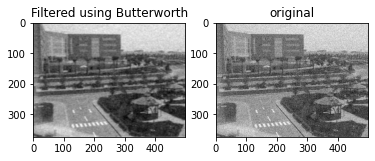

In [ ]:
def low_pass_filter(input_img, filter_type, order,cutoff_distance):

  fourier_1 = np.fft.fft2(input_img)
  fourier_shift = np.fft.fftshift(fourier_1)
  frequency_spectrum = 20*np.log(np.abs(fourier_shift)) 
  h = np.zeros(frequency_spectrum.shape)
  d = np.zeros(frequency_spectrum.shape)

  if(filter_type=="ideal"):
    for i in range(0,input_img.shape[0]):
      for j in range(0, input_img.shape[1]):
        d[i][j] = math.sqrt(((i-(input_img.shape[0]//2))**2)+((j-(input_img.shape[1]//2))**2))
        if (d[i][j]<= cutoff_distance):
          h[i][j] = 1
        else:
          h[i][j] = 0
    g = h * fourier_shift
    plt.imshow(h, cmap='gray')

    f_ishift = np.fft.ifftshift(g)
    filtered_img = np.fft.ifft2(f_ishift)
    filtered_img = np.abs(filtered_img)
    plt.subplot(1,2,1)
    plt.title('Filtered using ideal')
    plt.imshow(filtered_img, cmap = 'gray')
    if(cutoff_distance==5):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_ILPF_5.jpg', filtered_img)
    elif(cutoff_distance==30):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_ILPF_30.jpg', filtered_img)
    elif(cutoff_distance==50):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_ILPF_50.jpg', filtered_img)

    plt.subplot(1,2,2)
    plt.title('original')
    plt.imshow(input_img, cmap = 'gray')

    return filtered_img

  elif(filter_type=="Butterworth"):
    n=order
    for i in range(0,input_img.shape[0]):
      for j in range(0, input_img.shape[1]):
        d[i][j] = math.sqrt(((i-(input_img.shape[0]//2))**2)+((j-(input_img.shape[1]//2))**2))
        h[i][j] = (1)/(1+(d[i][j]/cutoff_distance)**(2*n))
      
    g = h * fourier_shift

    f_ishift = np.fft.ifftshift(g)
    filtered_img = np.fft.ifft2(f_ishift)
    filtered_img = np.abs(filtered_img)
    if(cutoff_distance==5 and n == 1):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_BLPF_5.jpg', filtered_img)
    elif(cutoff_distance==30 and n == 1):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_BLPF_30.jpg', filtered_img)
    elif(cutoff_distance==50 and n == 1):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_BLPF_50.jpg', filtered_img)
    
    plt.subplot(1,2,1)
    plt.title('Filtered using Butterworth')
    plt.imshow(filtered_img, cmap = 'gray')
    plt.subplot(1,2,2)
    plt.title('original')
    plt.imshow(input_img, cmap = 'gray')

    return filtered_img

  elif(filter_type=="Gaussian"):
    for i in range(0,input_img.shape[0]):
      for j in range(0, input_img.shape[1]):
        d[i][j] = math.sqrt(((i-(input_img.shape[0]//2))**2)+((j-(input_img.shape[1]//2))**2))
        h[i][j] = math.exp(-((d[i][j])**2)/(2*((cutoff_distance)**2)))
      
    g = h * fourier_shift
    plt.imshow(h, cmap='gray')

    f_ishift = np.fft.ifftshift(g)
    filtered_img = np.fft.ifft2(f_ishift)
    filtered_img = np.abs(filtered_img)

    if(cutoff_distance==5):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_GLPF_5.jpg', filtered_img)
    elif(cutoff_distance==30):
      cv2.imwrite(r'/content/gdrive/MyDriven/GUC_GLPF_30.jpg', filtered_img)
    elif(cutoff_distance==50):
      cv2.imwrite(r'/content/gdrive/MyDrive/GUC_GLPF_50.jpg', filtered_img)

    
    plt.subplot(1,2,1)
    plt.title('Filtered using Butterworth')
    plt.imshow(filtered_img, cmap = 'gray')
    plt.subplot(1,2,2)
    plt.title('original')
    plt.imshow(input_img, cmap = 'gray')

    return filtered_img

  else:
    print("Please Enter a valid type from (ideal, Butterworth, Gaussian)")
    return []

# Ouputs
img = plt.imread('GUC.jpg')

filteredimg = low_pass_filter(img,'ideal',1,5)


filteredimg = low_pass_filter(img,'ideal',1,30)


filteredimg = low_pass_filter(img,'ideal',1,50)


filteredimg = low_pass_filter(img,'Butterworth',1,5)


filteredimg = low_pass_filter(img,'Butterworth',1,30)


filteredimg = low_pass_filter(img,'Butterworth',1,50)


filteredimg = low_pass_filter(img,'Gaussian',1,5)


filteredimg = low_pass_filter(img,'Gaussian',1,30)


filteredimg = low_pass_filter(img,'Gaussian',1,50)